In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
LData_url='D:/study/s7 files/UG Project Files/Project Code/Final_Year_Project/Data/final data/DATA_3.csv'
LData=pd.read_csv(LData_url)
LData.drop(['Unnamed: 0'],inplace=True,axis=1)
LData.describe()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,0.012531,1.482225,-1.456710,2.938936,0.331833,0.188385,0.223935,1.523661,0.332321,4.156198,1.401264,6.027222,2.654037,-0.030335,7.793978,4.500342
std,0.006544,1.451925,1.454535,2.900695,0.279818,0.311321,0.166662,1.487578,0.279596,1.124141,0.206034,2.609790,3.895907,0.191216,4.187056,2.869315
min,0.000269,0.169396,-7.019547,0.347970,0.059445,0.003534,0.047975,0.175863,0.060592,1.561889,1.142035,1.783732,-1.396368,-2.378872,2.021232,0.000000
25%,0.010329,0.467976,-1.641542,0.912536,0.143530,0.020601,0.114099,0.479868,0.144246,3.227287,1.251108,4.056822,-0.064705,-0.097335,4.798629,2.000000
50%,0.012734,0.934295,-0.860956,1.802554,0.218981,0.047953,0.165830,0.957140,0.219562,3.793626,1.298062,4.934770,0.678021,0.006737,5.937037,4.500000
75%,0.014770,1.710230,-0.444559,3.349517,0.414746,0.172015,0.296048,1.734279,0.414865,4.893008,1.529616,7.314185,4.114212,0.065531,9.692144,7.000000
max,0.176966,7.559576,-0.159174,14.579123,1.192217,1.421381,0.761327,7.559576,1.192224,10.321060,2.380382,20.290715,30.929601,1.199072,29.623924,9.000000


In [48]:
Data_modified=LData
del Data_modified['Label']
del Data_modified['FAULT TYPE']
Data_modified

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
0,0.011187,1.279438,-1.311982,2.591420,0.298905,0.089344,0.206043,1.311982,0.299114,4.386222,1.451708,6.367511,3.455019,-0.256605,8.113016,0
1,0.013728,1.349116,-1.371020,2.720136,0.269052,0.072389,0.189617,1.371020,0.269402,5.089124,1.420770,7.230475,3.765359,-0.177962,9.071524,0
2,0.012689,1.553767,-1.241053,2.794820,0.283981,0.080645,0.198589,1.553767,0.284264,5.465930,1.431419,7.824038,4.223392,-0.070134,9.823281,0
3,0.013143,1.348490,-1.202876,2.551366,0.273550,0.074830,0.189475,1.348490,0.273865,4.923914,1.445388,7.116969,4.028215,0.031575,8.946333,0
4,0.015546,1.299048,-1.366014,2.665062,0.281018,0.078971,0.197717,1.366014,0.281447,4.853532,1.423483,6.908922,4.118437,-0.093912,8.594890,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,0.014017,0.206112,-0.185876,0.391988,0.062031,0.003848,0.051067,0.206112,0.063595,3.241011,1.245316,4.036082,-0.066851,-0.152331,4.761452,9
2918,0.013751,0.216334,-0.214248,0.430582,0.066314,0.004398,0.054470,0.216334,0.067725,3.194307,1.243334,3.971592,-0.019693,-0.131660,4.656300,9
2919,0.015083,0.207155,-0.235110,0.442265,0.067297,0.004529,0.056020,0.235110,0.068967,3.409020,1.231121,4.196914,-0.091298,-0.275218,4.903307,9
2920,0.014486,0.187128,-0.230729,0.417857,0.061480,0.003780,0.050667,0.230729,0.063164,3.652878,1.246638,4.553818,-0.024136,-0.143131,5.378604,9


In [49]:
scaler=StandardScaler()
scaler.fit(Data_modified.drop('Label_no',axis=1))
scaled_features=scaler.transform(Data_modified.drop('Label_no',axis=1))
scaled_features

array([[-0.20546044, -0.13969171,  0.09951844, ...,  0.20563097,
        -1.18352138,  0.07620918],
       [ 0.18292767, -0.09169373,  0.05892247, ...,  0.28530258,
        -0.77217435,  0.30517026],
       [ 0.02411318,  0.04928239,  0.14829098, ...,  0.40289053,
        -0.20816859,  0.484744  ],
       ...,
       [ 0.39000423, -0.87834333,  0.84000042, ..., -0.70479206,
        -1.28087901, -0.69050104],
       [ 0.29878055, -0.89213916,  0.84301284, ..., -0.68755009,
        -0.5899856 , -0.57696581],
       [ 0.62738965, -0.86727793,  0.85348459, ..., -0.68567747,
        -0.12181454, -0.75439933]])

In [50]:
scaled_df=pd.DataFrame(scaled_features,columns=Data_modified.columns[:-1])
scaled_df['Label_no']=Data_modified['Label_no']
scaled_df.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
0,-0.205460,-0.139692,0.099518,-0.119825,-0.117697,-0.318184,-0.107373,-0.142322,-0.118787,0.204657,0.244874,0.130412,0.205631,-1.183521,0.076209,0
1,0.182928,-0.091694,0.058922,-0.075443,-0.224402,-0.372656,-0.205950,-0.102628,-0.225074,0.830043,0.094691,0.461132,0.285303,-0.772174,0.305170,0
2,0.024113,0.049282,0.148291,-0.049692,-0.171042,-0.346132,-0.152107,0.020242,-0.171910,1.165295,0.146387,0.688608,0.402891,-0.208169,0.484744,0
3,0.093537,-0.092125,0.174542,-0.133636,-0.208325,-0.364816,-0.206800,-0.117776,-0.209108,0.683052,0.214199,0.417632,0.352784,0.323827,0.275266,0
4,0.460803,-0.126183,0.062365,-0.094433,-0.181633,-0.351511,-0.157338,-0.105994,-0.181986,0.620432,0.107863,0.337901,0.375946,-0.332541,0.191315,0


In [51]:
#X=scaled_df
#Y=Data_modified['Label_no']
train_data,test_data = train_test_split(scaled_df, test_size=750,stratify = scaled_df['Label_no'], random_state=132)
train_data['Label_no'].value_counts()

2    218
4    218
6    218
3    218
5    218
8    217
7    217
0    216
1    216
9    216
Name: Label_no, dtype: int64

In [52]:
svm_model=SVC()

In [53]:
svm_model.fit(train_data.iloc[:,:-1],train_data['Label_no'])

SVC()

In [54]:
train_predictions=svm_model.predict(train_data.iloc[:,:-1])
test_predictions=svm_model.predict(test_data.iloc[:,:-1])

In [55]:
fault_type = ['IR_7_1','IR_14_1','IR_21_1','BL_7_1','BL_14_1','BL_21_1','OR_7_1','OR_14_1','OR_21_1','NORMAL']
print(classification_report(test_data['Label_no'],test_predictions,target_names=fault_type))

              precision    recall  f1-score   support

      IR_7_1       0.94      1.00      0.97        75
     IR_14_1       0.91      0.85      0.88        75
     IR_21_1       0.96      1.00      0.98        75
      BL_7_1       1.00      1.00      1.00        75
     BL_14_1       0.62      0.71      0.66        75
     BL_21_1       0.96      0.89      0.92        75
      OR_7_1       0.66      0.84      0.74        75
     OR_14_1       0.78      0.63      0.70        75
     OR_21_1       0.97      0.77      0.86        75
      NORMAL       0.97      1.00      0.99        75

    accuracy                           0.87       750
   macro avg       0.88      0.87      0.87       750
weighted avg       0.88      0.87      0.87       750



In [56]:

from sklearn.model_selection import GridSearchCV

In [57]:
parameter_grid={'C':[0.1,1,10,55,100,1000],'gamma':[1,0.1,0.01,0.05,0.001,0.0001]}

In [58]:
grid_value=GridSearchCV(SVC(),parameter_grid,refit=True,verbose=3)

In [59]:
grid_value.fit(train_data.iloc[:,:-1],train_data['Label_no'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.2s
[CV 2/5] END ..............................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 55, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.05, 0.001, 0.0001]},
             verbose=3)

In [60]:
grid_value.best_params_


{'C': 100, 'gamma': 0.05}

In [61]:
grid_value.best_estimator_

SVC(C=100, gamma=0.05)

In [62]:
grid_test_predictions=grid_value.predict(test_data.iloc[:,:-1])

In [63]:
fault_type = ['IR_7_1','IR_14_1','IR_21_1','BL_7_1','BL_14_1','BL_21_1','OR_7_1','OR_14_1','OR_21_1','NORMAL']
print(classification_report(test_data['Label_no'],grid_test_predictions,target_names=fault_type))

              precision    recall  f1-score   support

      IR_7_1       0.97      0.99      0.98        75
     IR_14_1       0.93      0.88      0.90        75
     IR_21_1       0.99      1.00      0.99        75
      BL_7_1       1.00      1.00      1.00        75
     BL_14_1       0.68      0.72      0.70        75
     BL_21_1       0.99      0.96      0.97        75
      OR_7_1       0.72      0.80      0.76        75
     OR_14_1       0.80      0.81      0.81        75
     OR_21_1       0.98      0.87      0.92        75
      NORMAL       1.00      1.00      1.00        75

    accuracy                           0.90       750
   macro avg       0.91      0.90      0.90       750
weighted avg       0.91      0.90      0.90       750



In [64]:
train_confusion_matrix = confusion_matrix(train_data['Label_no'], train_predictions)
test_confusion_matrix = confusion_matrix(test_data['Label_no'], test_predictions)
fault_type = ['IR_7_1','IR_14_1','IR_21_1','BL_7_1','BL_14_1','BL_21_1','OR_7_1','OR_14_1','OR_21_1','NORMAL']

Text(140.09375, 0.5, 'True')

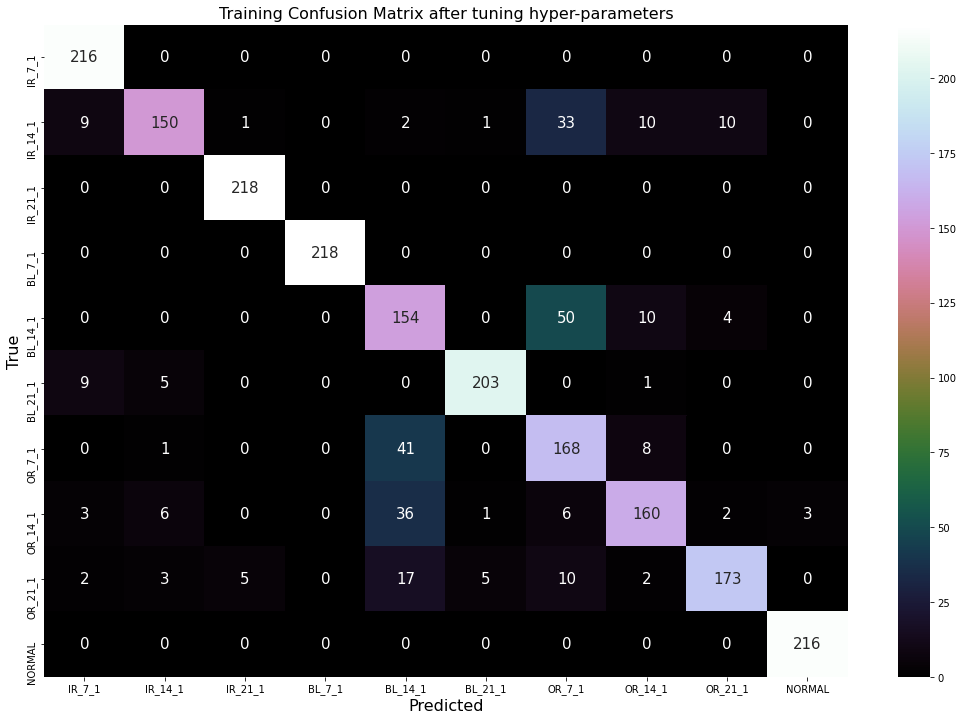

In [65]:

plt.figure(1,figsize=(18,12))
sns.heatmap(train_confusion_matrix, annot= True,cmap='cubehelix',xticklabels=fault_type,yticklabels=fault_type,fmt='d',annot_kws={"size":15})
plt.title('Training Confusion Matrix after tuning hyper-parameters',fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.ylabel('True',fontsize = 16)


Text(140.09375, 0.5, 'True')

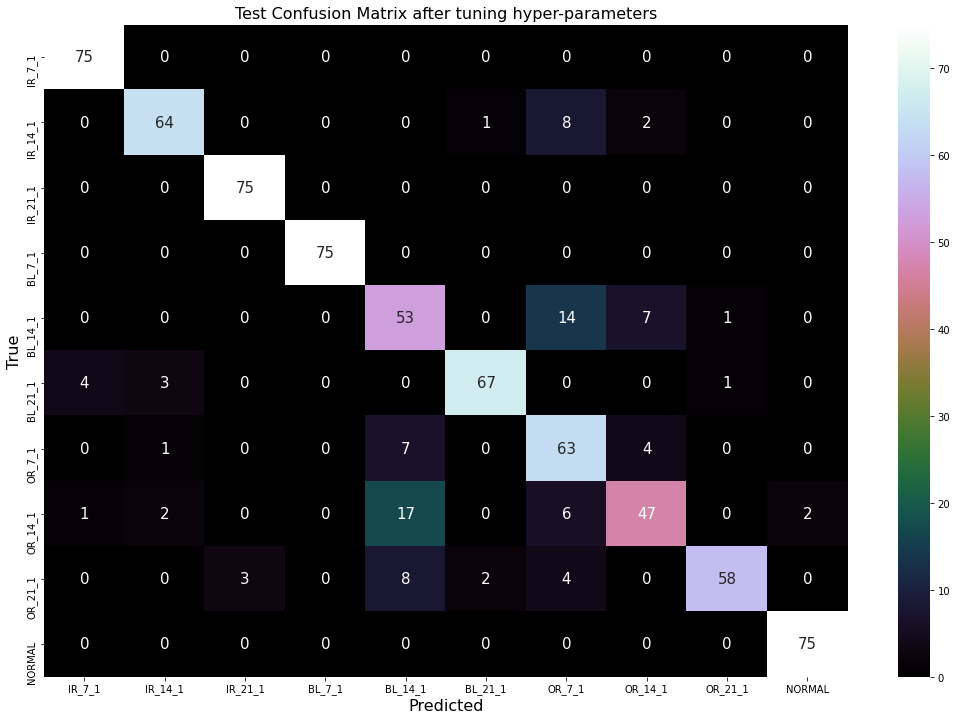

In [66]:
plt.figure(2,figsize=(18,12))
sns.heatmap(test_confusion_matrix, annot = True,cmap='cubehelix',xticklabels=fault_type,yticklabels=fault_type,annot_kws={"size":15})
plt.title('Test Confusion Matrix after tuning hyper-parameters',fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.ylabel('True',fontsize = 16)

Text(140.09375, 0.5, 'True')

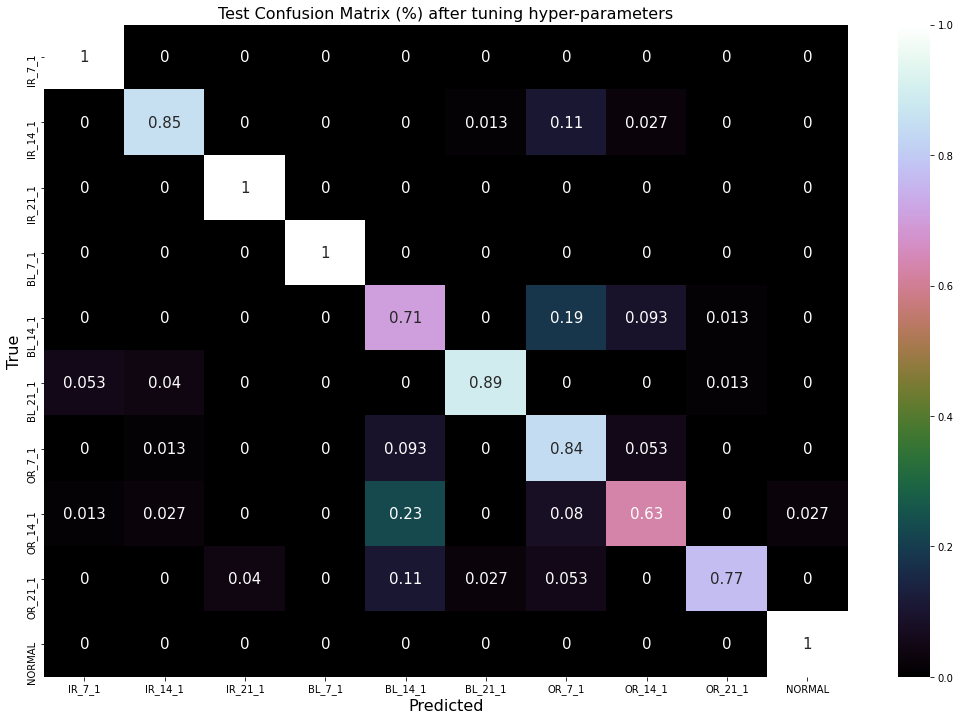

In [67]:
plt.figure(3,figsize=(18,12))
sns.heatmap(test_confusion_matrix/75, annot = True,cmap='cubehelix',xticklabels=fault_type,yticklabels=fault_type,annot_kws={"size":15})
plt.title('Test Confusion Matrix (%) after tuning hyper-parameters',fontsize = 16)
plt.xlabel('Predicted',fontsize = 16)
plt.ylabel('True',fontsize = 16)